***Importing Essential Libraries for Deep Learning and Computer Vision***

In [151]:
pip install dlib opencv-python imutils


  Using cached dlib-20.0.0.tar.gz (3.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached imutils-0.5.4-py3-none-any.whl
Failed to build dlib
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [46 lines of output]
  running bdist_wheel
  running build
  running build_ext
  Traceback (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\soumy\anaconda3\Scripts\cmake.exe\__main__.py", line 4, in <module>
  ModuleNotFoundError: No module named 'cmake'
  
  
                     CMake is not installed on your system!
  
      Or it is possible some broken copy of cmake is installed on your system.
      It is unfortunately very common for python package managers to include
      broken copies of cmake.  So if the error above this refers to some file
      path to a cmake file inside a python or anaconda or miniconda path then you
      should delete that broken copy of cmake from your computer.
  
      Instead, please get an official copy of cmake from one of these known good
      sources of an official cmake:
         

In [152]:


import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")



***Loading and Converting an Image to Grayscale Using OpenCV***

In [154]:

img_array = cv2.imread(r"C:\Users\soumy\Downloads\Final year project\Test Dataset\closed eyes\s0011_00292_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)



***Converting an Image to a NumPy Array for Processing***

In [156]:

img_array = np.array(img_array).astype(np.float32)
print("Shape:", img_array.shape)
print("Dtype:", img_array.dtype)



Shape: (84, 84)
Dtype: float32


***Displaying a Grayscale Image Using Matplotlib***

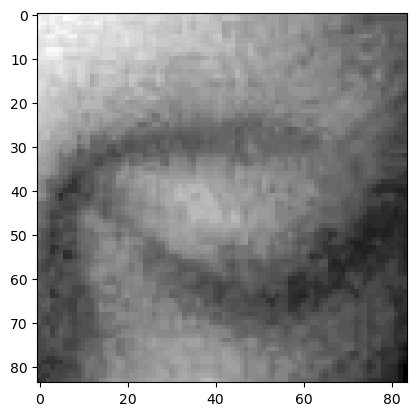

In [158]:


plt.imshow(img_array, cmap='gray')
plt.show()



In [159]:

img_array.shape



(84, 84)

***Loading and Displaying Grayscale Images from a Dataset Using OpenCV***

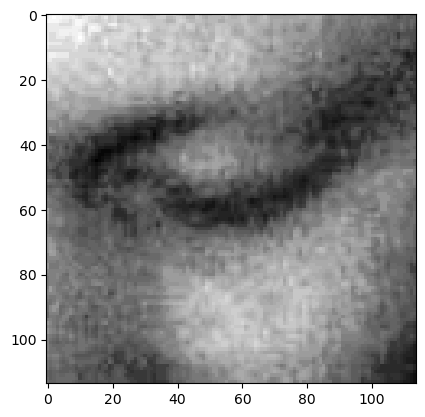

In [161]:


import os
import cv2

classes = ["closed eyes", "open eyes"]
Datadirectory = r"C:\Users\soumy\Downloads\Final year project\Test Dataset" # Use a string instead of a list

for category in classes:
    path = os.path.join(Datadirectory, category)  # Join with a string, not a list
    if os.path.exists(path):  # Check if the path exists before proceeding
        for img in os.listdir(path):
            img_path = os.path.join(path, img)  # Full path to the image
            img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
            plt.imshow(img_array, cmap="gray")
            plt.show()
            break
        break



***Loading, Converting, and Resizing an Image Using OpenCV***

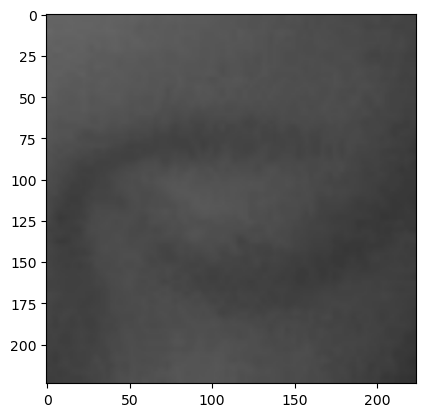

In [163]:


import cv2
import matplotlib.pyplot as plt

# Load an image
backtorgb = cv2.imread(r"C:\Users\soumy\Downloads\Final year project\Test Dataset\closed eyes\s0011_00272_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)
# Convert the image from BGR to RGB (OpenCV uses BGR by default)
backtorgb = cv2.cvtColor(backtorgb, cv2.COLOR_BGR2RGB)

# Resize the image
img_size = 224
new_array = cv2.resize(backtorgb, (img_size, img_size))

# Display the resized image
plt.imshow(new_array)
plt.show()



***Creating a Training Dataset for Deep Learning Model***

In [165]:


training_Data = []

def create_training_Data():
    for category in classes:
        path = os.path.join(Datadirectory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass



In [166]:


create_training_Data()



In [167]:

print(len(training_Data))



420


In [168]:

import random

random.shuffle(training_Data)



***Preparing Image Data for Deep Learning Model Training***

In [170]:


x = []
y = []

for features,label in training_Data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, img_size, img_size, 3)



In [171]:


x.shape



(420, 224, 224, 3)

In [172]:


x = np.array(x, dtype=np.float32); x = np.array(x, dtype=np.float32)



***Normalizing and Processing Image Data in Batches***

In [174]:


batch_size = 1000
for i in range(0, len(x), batch_size):
    batch = x[i:i + batch_size] / 255.0
    # Process batch



In [175]:


import numpy as np

# Example of converting an array to float32
x = np.array(x, dtype=np.float32)
x = x / 255.0



In [176]:


y=np.array(y)



***Saving Processed Data Using Pickle for Future Use***

In [178]:


import pickle

pickle_out = open("x.pickle","wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()



***Loading Preprocessed Data Using Pickle***

In [180]:


pickle_in = open("x.pickle","rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)



In [181]:


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



In [182]:


from tensorflow.keras.applications import MobileNet

# Load the MobileNet model
model = MobileNet()



In [183]:


model.summary()



Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

***Modifying a Pre-Trained Model for Custom Classification***

In [185]:


from keras.models import Model
from keras import layers

# Assuming 'model' is your pre-trained model
base_input = model.input
base_output = model.layers[-4].output

# Add new layers
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

# Create the new model
new_model = Model(inputs=base_input, outputs=final_output)



In [186]:


new_model.summary()



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

***Building and Training a Simple Neural Network for Image Classification***

In [188]:


from keras.layers import Input, Dense, Flatten
from keras.models import Model

# Define input for image data
base_input = Input(shape=(224, 224, 3))
x = Flatten()(base_input)  # Flatten the image into a vector
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
final_output = Dense(1, activation='sigmoid')(x)

# Create the model
new_model = Model(inputs=base_input, outputs=final_output)

# Compile the model
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Generate image-like data
x = np.random.random((100, 224, 224, 3))  # 100 samples, each 224x224 with 3 channels
y = np.random.randint(2, size=(100, 1))  # 100 binary labels

# Fit the model
new_model.fit(x, y, epochs=1, validation_split=0.1)



3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 249ms/step - accuracy: 0.6343 - loss: 17.4792 - val_accuracy: 0.8000 - val_loss: 5.7740


In [189]:


model.save('my_model.keras')



In [190]:


new_model = tf.keras.models.load_model(r"C:\Users\soumy\Downloads\Final year project\my_model_Drowsiness.h5")



In [191]:


img_array = cv2.imread(r"C:\Users\soumy\Downloads\Final year project\Test Dataset\open eyes\s0001_01895_0_0_1_0_0_01.png", cv2.IMREAD_GRAYSCALE)
bactorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(bactorgb,(img_size,img_size))



In [192]:


x_input = np.array(new_array).reshape(1, img_size, img_size, 3)



In [193]:


x_input.shape



(1, 224, 224, 3)

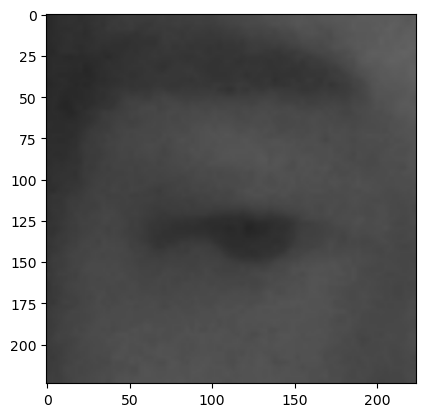

In [194]:


plt.imshow(new_array)



In [195]:


x_input = x_input/255.0



In [196]:


prediction = new_model.predict(x_input); prediction = new_model.predict(x_input)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [197]:


prediction



array([[0.42250338]], dtype=float32)

In [198]:


img = cv2.imread(r"C:\Users\soumy\Downloads\Final year project\Test Dataset\Demo.jpg")



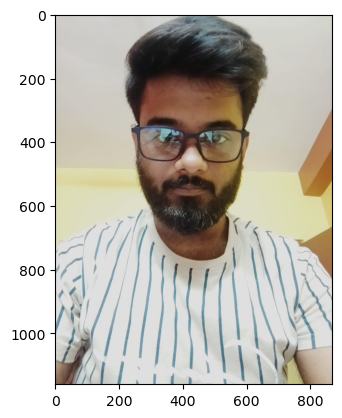

In [199]:


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))



In [200]:


faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + r"C:\Users\soumy\Downloads\Final year project\Test Dataset\haarcascade_frontalface_default.xml")



In [201]:


eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + r"C:\Users\soumy\Downloads\Final year project\Test Dataset\haarcascade_eye.xml")



In [202]:


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



***Loading Haar Cascade for Eye Detection Using OpenCV***

In [204]:


import cv2

# Use a custom path or OpenCV's default haarcascades path
eye_cascade_path = r"C:\Users\soumy\Downloads\Final year project\Test Dataset\haarcascade_eye.xml"

# Initialize the Haar cascade classifier
eye_cascade = cv2.CascadeClassifier(eye_cascade_path)

# Check if the classifier loaded correctly
if eye_cascade.empty():
    print("Error loading Haar cascade file. Check the file path.")
else:
    print("Haar cascade file loaded successfully.")



Haar cascade file loaded successfully.


***Loading and Converting an Image to Grayscale Using OpenCV***

In [206]:


import cv2

# Load the image
file_path = r"C:\Users\soumy\Downloads\Final year project\Test Dataset\Demo.jpg"
img = cv2.imread(file_path)

# Check if the image is loaded correctly
if img is None:
    print("Error loading image. Please check the file path.")
else:
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



In [207]:


eyes = eye_cascade.detectMultiScale(gray,1.1,4)



In [208]:


for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)



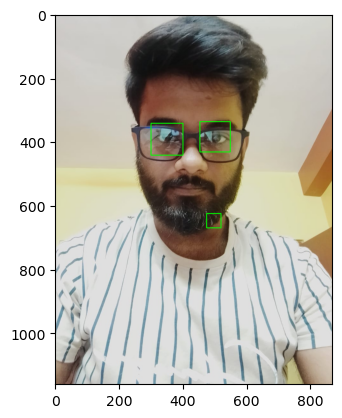

In [209]:



plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))



***Loading Haar Cascade for Eye Detection Using OpenCV***

In [211]:


import cv2

# Load the Haar cascade file for eye detection
eye_cascade_path = r"C:\Users\soumy\Downloads\Final year project\Test Dataset\haarcascade_eye.xml"
eye_cascade = cv2.CascadeClassifier(eye_cascade_path)

# Check if the cascade was loaded successfully
if eye_cascade.empty():
    print("Error loading Haar cascade file. Please check the file path.")
else:
    print("Haar cascade file loaded successfully.")



Haar cascade file loaded successfully.


***Loading and Converting an Image to Grayscale Using OpenCV***

In [213]:


import cv2

# Load the image
file_path = r"C:\Users\soumy\Downloads\Final year project\Test Dataset\pranjal bal.jpg"
img = cv2.imread(file_path)

if img is None:
    print("Error loading image. Please check the file path.")
else:
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



***Eye Detection Using Haar Cascade in OpenCV***

In [215]:


# Detect eyes
eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

if len(eyes) == 0:
    print("No eyes detected")
else:
    for (x, y, w, h) in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        # Detect eyes within the detected face region
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not detected within the detected region")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]



Eyes are not detected within the detected region
Eyes are not detected within the detected region
Eyes are not detected within the detected region
Eyes are not detected within the detected region
Eyes are not detected within the detected region


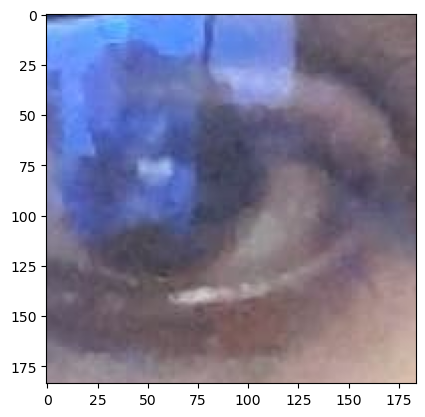

In [216]:


plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))



In [217]:


eyes_roi.shape



(184, 184, 3)

In [218]:


final_image = cv2.resize(eyes_roi,(224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/255.0



In [219]:


final_image.shape



(1, 224, 224, 3)

In [220]:


new_model.predict(final_image)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[0.99999326]], dtype=float32)

***Loading Haar Cascades for Face and Eye Detection Using OpenCV***

In [222]:


import cv2

# Use default haarcascades path
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')



In [223]:
pip install --user opencv-python mediapipe scipy

Note: you may need to restart the kernel to use updated packages.


***Loading Custom Haar Cascade Files for Face and Eye Detection***

In [225]:


import cv2

# Custom path for Haar cascades
eye_cascade_path = r"C:\Users\soumy\Downloads\Final year project\Test Dataset\haarcascade_frontalface_default.xml"
face_cascade_path = r"C:\Users\soumy\Downloads\Final year project\Test Dataset\haarcascade_eye.xml"

eye_cascade = cv2.CascadeClassifier(eye_cascade_path)
face_cascade = cv2.CascadeClassifier(face_cascade_path)

# Check if the classifiers are loaded
if eye_cascade.empty():
    print("Error loading eye cascade")
if face_cascade.empty():
    print("Error loading face cascade")



***Real-Time Drowsiness Detection Using Eye Aspect Ratio (EAR) and Mediapipe***

In [286]:
import cv2
import numpy as np
import winsound
from scipy.spatial import distance as dist
import mediapipe as mp

# Constants and counters
EAR_CONSEC_FRAMES = 48
YAWN_CONSEC_FRAMES = 25
closed_counter = 0
yawn_counter = 0

# Calibration variables
calibration_mode = True
ear_values = []
mar_values = []
calibration_frames = 30
EAR_THRESHOLD = 0.25
MAR_THRESHOLD = 0.80

# Mediapipe setup
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False,
                                   max_num_faces=1,
                                   refine_landmarks=True,
                                   min_detection_confidence=0.5,
                                   min_tracking_confidence=0.5)

# Landmark Indexes
LEFT_EYE = [362, 385, 387, 263, 373, 380]
RIGHT_EYE = [33, 160, 158, 133, 153, 144]
INNER_LIP = [78, 308, 13, 14, 17, 82, 312]
OUTER_LIP = [61, 291, 0, 17, 78, 308, 191, 80]

# EAR Calculation
def calculate_EAR(eye):
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    return (A + B) / (2.0 * C)

# MAR Calculation
def calculate_MAR(outer, inner):
    A = dist.euclidean(inner[2], inner[4])
    B = dist.euclidean(inner[2], inner[3])
    C = dist.euclidean(outer[0], outer[1])
    return (A + B) / (2.0 * C)

# Check smile or tongue
def is_smile_or_tongue(outer):
    width = dist.euclidean(outer[0], outer[1])
    height = dist.euclidean(outer[3], outer[7])
    ratio = height / width
    return ratio < 0.18  # Smile/tongue = flatter shape

# Gamma Correction
def adjust_gamma(image, gamma=1.5):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Brightness Enhancement
def enhance_brightness(image):
    yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    yuv[:, :, 0] = cv2.equalizeHist(yuv[:, :, 0])
    return cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)

# Webcam
cap = cv2.VideoCapture(0)
mar_history = []

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame = adjust_gamma(frame, 1.5)
        frame = enhance_brightness(frame)
        frame = cv2.GaussianBlur(frame, (3, 3), 0)
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(rgb_frame)

        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                left_eye = [(int(face_landmarks.landmark[i].x * frame.shape[1]),
                             int(face_landmarks.landmark[i].y * frame.shape[0])) for i in LEFT_EYE]
                right_eye = [(int(face_landmarks.landmark[i].x * frame.shape[1]),
                              int(face_landmarks.landmark[i].y * frame.shape[0])) for i in RIGHT_EYE]
                inner_lip = [(int(face_landmarks.landmark[i].x * frame.shape[1]),
                              int(face_landmarks.landmark[i].y * frame.shape[0])) for i in INNER_LIP]
                outer_lip = [(int(face_landmarks.landmark[i].x * frame.shape[1]),
                              int(face_landmarks.landmark[i].y * frame.shape[0])) for i in OUTER_LIP]

                ear = (calculate_EAR(left_eye) + calculate_EAR(right_eye)) / 2.0
                mar = calculate_MAR(outer_lip, inner_lip)

                mar_history.append(mar)
                if len(mar_history) > 5:
                    mar_history.pop(0)
                smooth_mar = np.mean(mar_history)

                cv2.polylines(frame, [np.array(left_eye)], True, (0, 255, 0), 1)
                cv2.polylines(frame, [np.array(right_eye)], True, (0, 255, 0), 1)
                cv2.polylines(frame, [np.array(inner_lip)], True, (255, 0, 0), 1)
                cv2.polylines(frame, [np.array(outer_lip)], True, (0, 0, 255), 1)

                if calibration_mode:
                    ear_values.append(ear)
                    mar_values.append(smooth_mar)

                    cv2.putText(frame, f"Calibrating... {len(ear_values)}/{calibration_frames}", (10, 30),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)

                    if len(ear_values) >= calibration_frames:
                        EAR_THRESHOLD = np.mean(ear_values) * 0.88
                        MAR_THRESHOLD = np.mean(mar_values) * 1.30
                        calibration_mode = False 
                        print(f"Calibration Complete: EAR={EAR_THRESHOLD:.2f}, MAR={MAR_THRESHOLD:.2f}")
                        winsound.Beep(1500, 700)
                    continue

                # Drowsiness
                if ear < EAR_THRESHOLD:
                    closed_counter += 1
                    if closed_counter >= EAR_CONSEC_FRAMES:
                        cv2.putText(frame, "DROWSINESS ALERT!", (10, 30),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                        winsound.Beep(1000, 500)
                    else:
                        cv2.putText(frame, "Closed Eyes", (10, 60),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                else:
                    closed_counter = 0
                    cv2.putText(frame, "Open Eyes", (10, 60),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

                # Yawning
                vertical_gap = abs(inner_lip[2][1] - inner_lip[4][1])  # landmark 13 and 17

                if (
                    smooth_mar > MAR_THRESHOLD and
                    vertical_gap > 33.5 and
                    not is_smile_or_tongue(outer_lip)
                ):
                    yawn_counter += 1
                    if yawn_counter >= YAWN_CONSEC_FRAMES:
                        cv2.putText(frame, "YAWNING ALERT!", (10, 120),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
                        winsound.Beep(1200, 500)
                    else:
                        cv2.putText(frame, "Yawning Detected", (10, 90),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
                else:
                    yawn_counter = 0

                # Metrics display
                cv2.putText(frame, f"EAR: {ear:.2f}", (300, 30),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
                cv2.putText(frame, f"MAR: {smooth_mar:.2f}", (300, 60),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
                cv2.putText(frame, f"Vertical Gap: {vertical_gap:.2f}", (300, 90),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (100, 255, 255), 2)

        else:
            cv2.putText(frame, "No face detected", (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        cv2.imshow("Driver Drowsiness & Yawning Detection", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

finally:
    cap.release()
    cv2.destroyAllWindows()


Calibration Complete: EAR=0.11, MAR=0.16
